# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [63]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import os

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [64]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 589


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [87]:
# Set the API base URL
url =  "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=b9428241fbc57ee1c195ade5fcb49eb8"




# Build partial query URL:
#query_url=f'{url}appid={weather_api_key1}&units={units}&q='
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | greymouth
Processing Record 2 of Set 1 | akureyri
Processing Record 3 of Set 1 | conde
Processing Record 4 of Set 1 | kapuskasing
Processing Record 5 of Set 1 | waitangi
Processing Record 6 of Set 1 | kodiak
Processing Record 7 of Set 1 | iqaluit
Processing Record 8 of Set 1 | taoudenni
Processing Record 9 of Set 1 | thompson
Processing Record 10 of Set 1 | adamstown
Processing Record 11 of Set 1 | puerto natales
Processing Record 12 of Set 1 | wailua homesteads
Processing Record 13 of Set 1 | nouadhibou
Processing Record 14 of Set 1 | papatowai
Processing Record 15 of Set 1 | saynshand
Processing Record 16 of Set 1 | blackmans bay
Processing Record 17 of Set 1 | port augusta
Processing Record 18 of Set 1 | puerto baquerizo moreno
Processing Record 19 of Set 1 | vorgashor
Processing Record 20 of Set 1 | northam
Processing Record 21 of Set 1 | san antonio de pale
Processing Record 22 of Set 1 | ke

Processing Record 41 of Set 4 | yaren
Processing Record 42 of Set 4 | cannonvale
Processing Record 43 of Set 4 | hasaki
Processing Record 44 of Set 4 | vilyuchinsk
Processing Record 45 of Set 4 | regina
Processing Record 46 of Set 4 | kalevala
Processing Record 47 of Set 4 | klyuchi
Processing Record 48 of Set 4 | selfoss
Processing Record 49 of Set 4 | lebu
Processing Record 0 of Set 5 | broken hill
Processing Record 1 of Set 5 | hawaiian paradise park
Processing Record 2 of Set 5 | arkhangel'sk
Processing Record 3 of Set 5 | villa gesell
Processing Record 4 of Set 5 | moissala
Processing Record 5 of Set 5 | portland
Processing Record 6 of Set 5 | flin flon
Processing Record 7 of Set 5 | puerto san carlos
City not found. Skipping...
Processing Record 8 of Set 5 | kudahuvadhoo
Processing Record 9 of Set 5 | muang xay
Processing Record 10 of Set 5 | middelburg
Processing Record 11 of Set 5 | cabedelo
Processing Record 12 of Set 5 | gadzhiyevo
Processing Record 13 of Set 5 | ormond-by-th

Processing Record 28 of Set 8 | ouellah
City not found. Skipping...
Processing Record 29 of Set 8 | al fuwayliq
Processing Record 30 of Set 8 | guiglo
Processing Record 31 of Set 8 | morehead city
Processing Record 32 of Set 8 | acigol
City not found. Skipping...
Processing Record 33 of Set 8 | tobelo
Processing Record 34 of Set 8 | muroto-misakicho
Processing Record 35 of Set 8 | trinidad
Processing Record 36 of Set 8 | new norfolk
Processing Record 37 of Set 8 | constitucion
Processing Record 38 of Set 8 | esperantina
Processing Record 39 of Set 8 | berdigestyakh
Processing Record 40 of Set 8 | acapulco de juarez
Processing Record 41 of Set 8 | hengyang
Processing Record 42 of Set 8 | petropavlovsk-kamchatsky
Processing Record 43 of Set 8 | chabahar
Processing Record 44 of Set 8 | tralee
Processing Record 45 of Set 8 | north platte
Processing Record 46 of Set 8 | yuzhno-kurilsk
Processing Record 47 of Set 8 | newman
Processing Record 48 of Set 8 | ramhormoz
Processing Record 49 of Se

Processing Record 13 of Set 12 | licenciado benito juarez (campo gobierno)
City not found. Skipping...
Processing Record 14 of Set 12 | dapto
Processing Record 15 of Set 12 | pitkyaranta
Processing Record 16 of Set 12 | mogocha
Processing Record 17 of Set 12 | zabaykal'sk
Processing Record 18 of Set 12 | manokwari
Processing Record 19 of Set 12 | yemetsk
Processing Record 20 of Set 12 | qamdo
Processing Record 21 of Set 12 | tuy hoa
Processing Record 22 of Set 12 | sunne
Processing Record 23 of Set 12 | weno
Processing Record 24 of Set 12 | kalmunai
Processing Record 25 of Set 12 | kirensk
Processing Record 26 of Set 12 | delcevo
Processing Record 27 of Set 12 | urjala
Processing Record 28 of Set 12 | tostedt
Processing Record 29 of Set 12 | olyokminsk
Processing Record 30 of Set 12 | lake havasu city
Processing Record 31 of Set 12 | egersund
Processing Record 32 of Set 12 | tchintabaraden
Processing Record 33 of Set 12 | porto real do colegio
Processing Record 34 of Set 12 | blagovesh

In [88]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df

# Show Record Count
city_data_df.count()

City          558
Lat           558
Lng           558
Max Temp      558
Humidity      558
Cloudiness    558
Wind Speed    558
Country       558
Date          558
dtype: int64

In [68]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,greymouth,-42.4667,171.2000,13.01,60,0,1.62,NZ,1686021933
1,akureyri,65.6835,-18.0878,3.96,93,75,0.00,IS,1686021933
2,conde,-7.2597,-34.9075,22.70,100,20,2.06,BR,1686021933
3,kapuskasing,49.4169,-82.4331,12.05,54,75,3.60,CA,1686021933
4,waitangi,-43.9535,-176.5597,10.46,83,93,8.48,NZ,1686021933


In [69]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,badger,64.8000,-147.5333,25.21,28,20,3.09,US,1686016656
1,celestun,20.8667,-90.4000,27.04,78,41,7.37,MX,1686016657
2,mahajanga,-15.7167,46.3167,20.01,77,20,1.54,MG,1686016657
3,bilibino,68.0546,166.4372,13.57,46,100,3.46,RU,1686016466
4,fairmont,39.4851,-80.1426,17.51,66,0,1.06,US,1686016657


In [70]:
# Export the City_Data into a csv
output_data_file = "output_data/cities.csv"
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [71]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,badger,64.8000,-147.5333,25.21,28,20,3.09,US,1686016656
1,celestun,20.8667,-90.4000,27.04,78,41,7.37,MX,1686016657
2,mahajanga,-15.7167,46.3167,20.01,77,20,1.54,MG,1686016657
3,bilibino,68.0546,166.4372,13.57,46,100,3.46,RU,1686016466
4,fairmont,39.4851,-80.1426,17.51,66,0,1.06,US,1686016657
...,...,...,...,...,...,...,...,...,...
597,merizo village,13.2658,144.6691,31.31,83,100,4.13,GU,1686016749
598,chulakkurgan,43.7650,69.1814,29.62,15,1,3.19,KZ,1686016749
599,morondava,-20.2833,44.2833,21.76,75,0,3.01,MG,1686016749


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

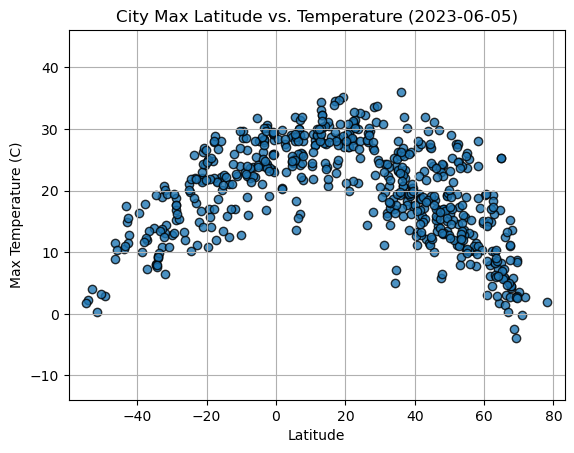

In [72]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE



from datetime import datetime
date_now = datetime.date(datetime.now())


x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]
plt.scatter(x_values, y_values,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")
# Set the limits of the y axis:
plt.ylim(min(city_data_df['Max Temp'])-10, max(city_data_df['Max Temp'])+10)

# Set the limits of the x axis:
plt.xlim(min(city_data_df['Lat'])-5, max(city_data_df['Lat'])+5)

plt.title(f"City Max Latitude vs. Temperature ({date_now})")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

#### Latitude Vs. Humidity

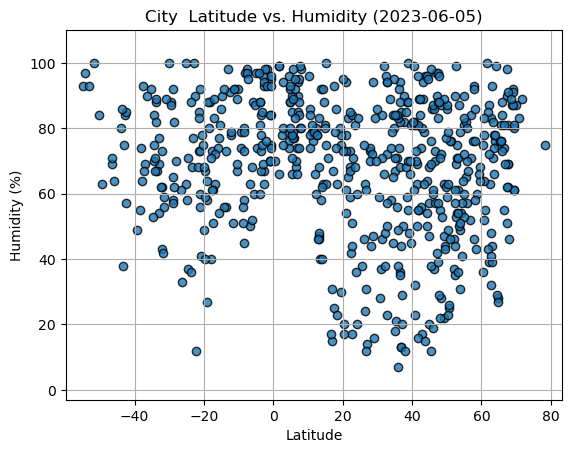

In [73]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]
plt.scatter(x_values, y_values,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")
# Set the limits of the y axis:
plt.ylim(min(city_data_df['Humidity'])-10, max(city_data_df['Humidity'])+10)

# Set the limits of the x axis:
plt.xlim(min(city_data_df['Lat'])-5, max(city_data_df['Lat'])+5)

plt.title(f"City  Latitude vs. Humidity ({date_now})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid()
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

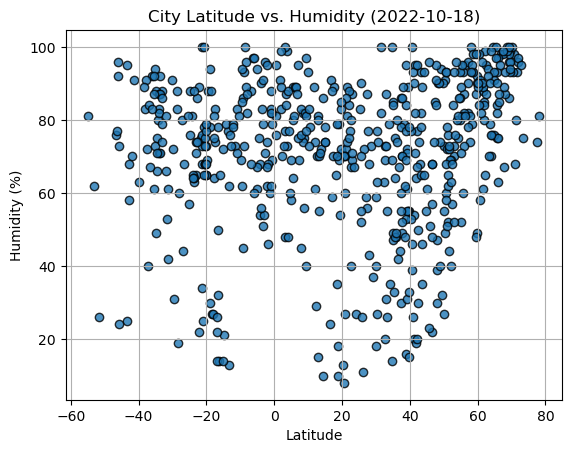

In [9]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

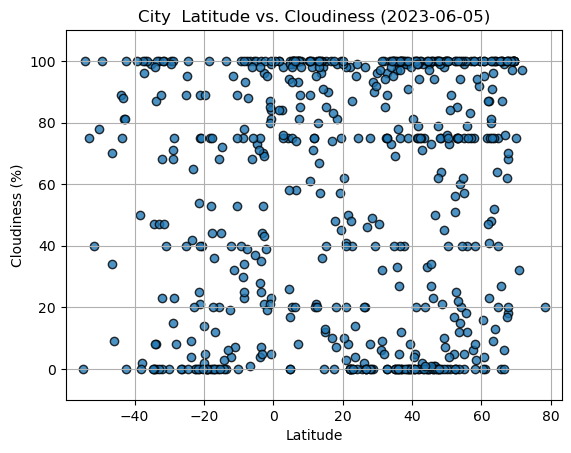

In [74]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]
plt.scatter(x_values, y_values,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")
# Set the limits of the y axis:
plt.ylim(min(city_data_df['Cloudiness'])-10, max(city_data_df['Cloudiness'])+10)

# Set the limits of the x axis:
plt.xlim(min(city_data_df['Lat'])-5, max(city_data_df['Lat'])+5)

plt.title(f"City  Latitude vs. Cloudiness ({date_now})")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid()
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

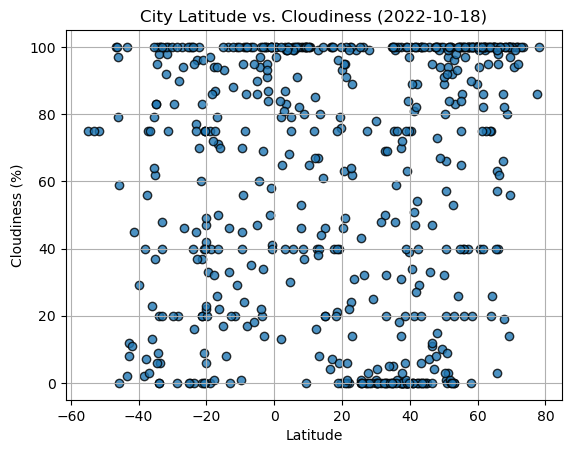

In [10]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

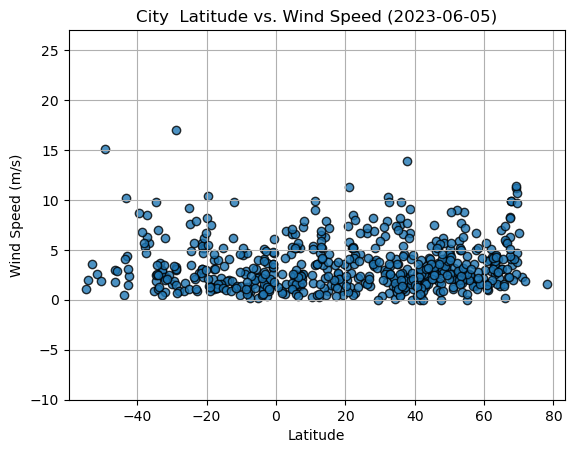

In [75]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]
plt.scatter(x_values, y_values,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")
# Set the limits of the y axis:
plt.ylim(min(city_data_df['Wind Speed'])-10, max(city_data_df['Wind Speed'])+10)

# Set the limits of the x axis:
plt.xlim(min(city_data_df['Lat'])-5, max(city_data_df['Lat'])+5)

plt.title(f"City  Latitude vs. Wind Speed ({date_now})")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid()

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [76]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Run regresson on southern hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [77]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

# Display sample data
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,badger,64.8000,-147.5333,25.21,28,20,3.09,US,1686016656
1,celestun,20.8667,-90.4000,27.04,78,41,7.37,MX,1686016657
3,bilibino,68.0546,166.4372,13.57,46,100,3.46,RU,1686016466
4,fairmont,39.4851,-80.1426,17.51,66,0,1.06,US,1686016657
5,la'ie,21.6477,-157.9253,29.98,65,50,2.68,US,1686016657


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230
6,albany,42.6001,-73.9662,10.36,74,29,2.10,US,1666108231


In [78]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE


southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
# Display sample data
#southern_hemi_df.head()
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,mahajanga,-15.7167,46.3167,20.01,77,20,1.54,MG,1686016657
7,afaahiti,-17.7500,-149.2833,27.93,73,44,4.00,PF,1686016506
8,springs,-26.2500,28.4000,11.90,33,0,1.64,ZA,1686016658
11,edinburgh of the seven seas,-37.0676,-12.3116,11.90,69,100,8.47,SH,1686016658
15,gualaceo,-2.9000,-78.7833,16.81,96,70,1.78,EC,1686016492


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
5,ushuaia,-54.8000,-68.3000,8.81,81,75,3.09,AR,1666108231
7,carnarvon,-24.8667,113.6333,20.02,76,0,7.46,AU,1666108232
9,saint-pierre,-21.3393,55.4781,22.82,68,0,5.14,RE,1666108236
10,colorado,-22.8375,-51.9731,20.36,86,96,4.69,BR,1666107965


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.5429913207132834


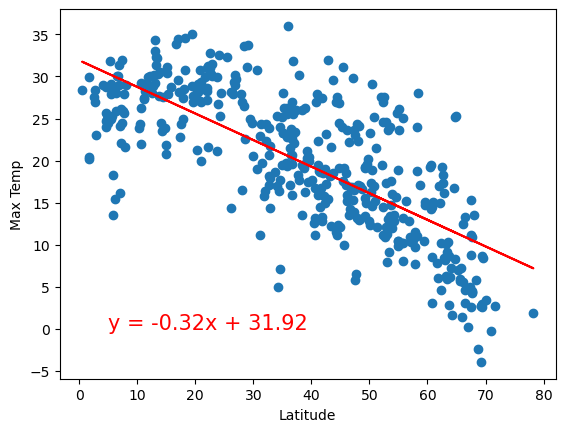

In [79]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp',(5,0))
#plt.savefig("../output_data/Fig5.png")
#plt.savefig("output_data/Fig5.png")

The r-value is: 0.7161472181434118


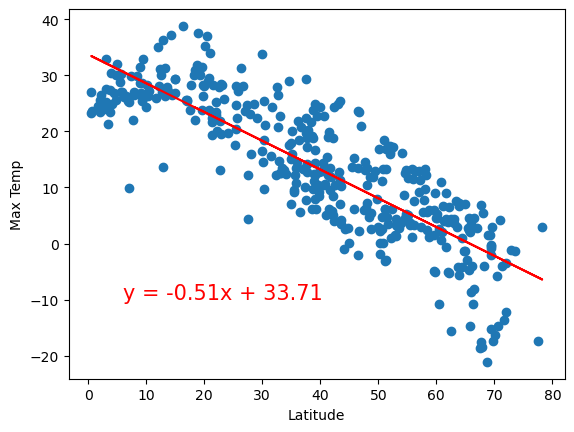

In [15]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.6401342216662038


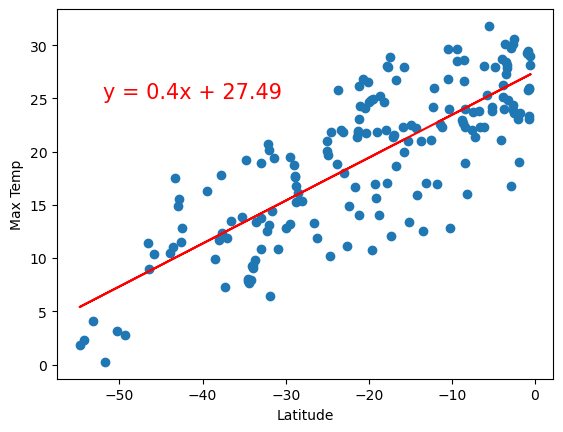

In [80]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp',(-52,25))
#plt.savefig("../output_data/Fig5.png")
#plt.savefig("output_data/Fig6.png")

The r-value is: 0.4121057168607245


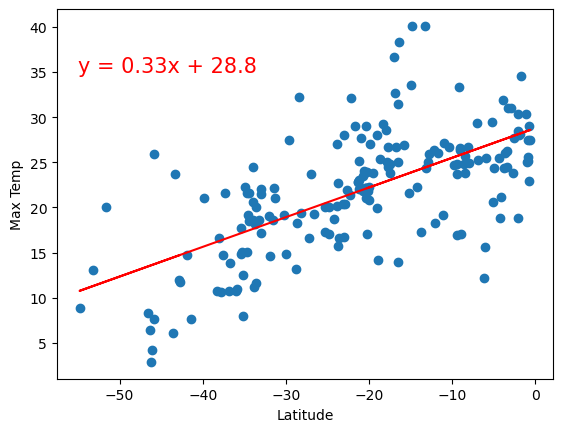

In [16]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE


**Discussion about the linear relationship:** YOUR RESPONSE HERE
The findings of these analysis showed that there is a higher temperature for cities that are near to the equator (Latitude 0), however, when we go farther from the equator towards the north the temperature decreases highly. However, when we go to the south the temperature decreases.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.008656566259204163


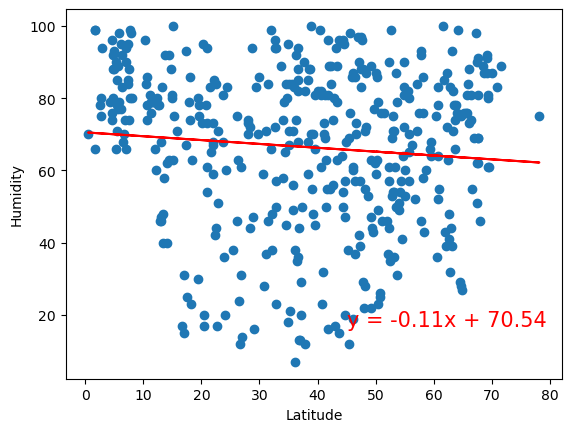

In [81]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity',(45,17))
#plt.savefig("../output_data/Fig5.png")
#plt.savefig("output_data/Fig7.png")

The r-value is: 0.05689741545789598


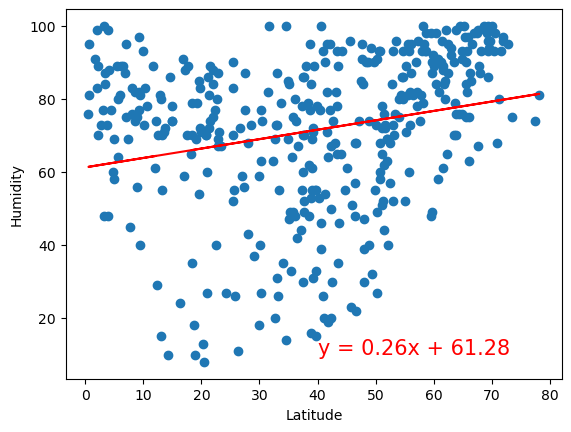

In [17]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.01376863054817613


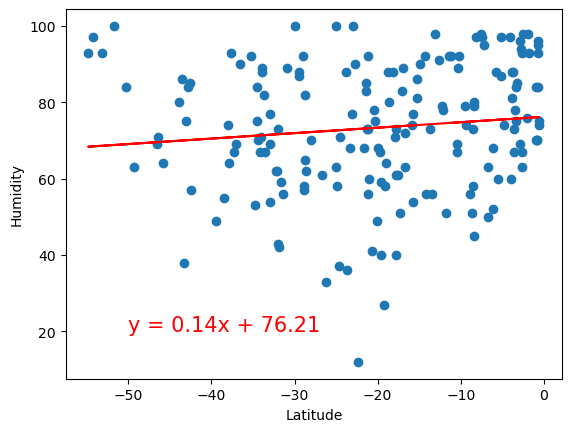

In [82]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity',(-50,20))
#plt.savefig("../output_data/Fig5.png")
#plt.savefig("output_data/Fig8.png")

The r-value is: 0.0002808747046324607


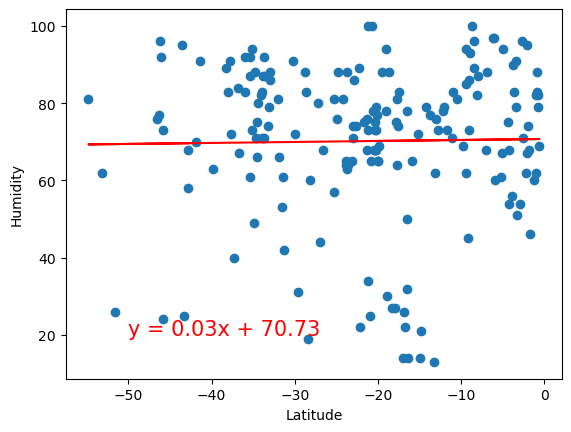

In [18]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE
The result from the data showed that there is a very week, almost none negative correlation between Humidity (%) and Latitude in the Southern Hemisphere cities.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.0031348076110776384


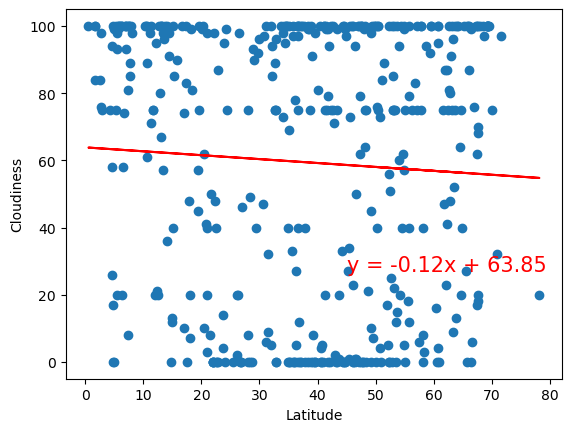

In [83]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness',(45,27))
#plt.savefig("../output_data/Fig5.png")
#plt.savefig("output_data/Fig9.png")

The r-value is: 0.024026517125811015


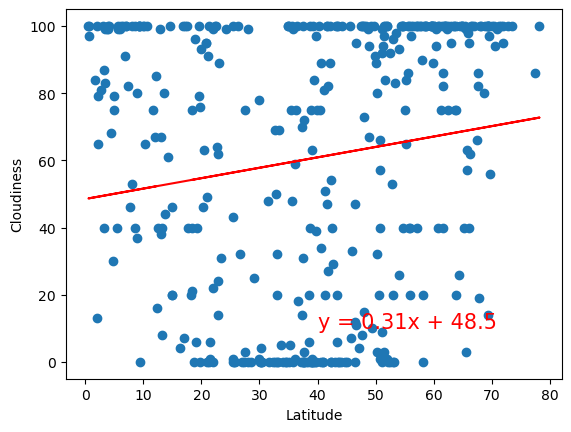

In [19]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 7.881050540130316e-05


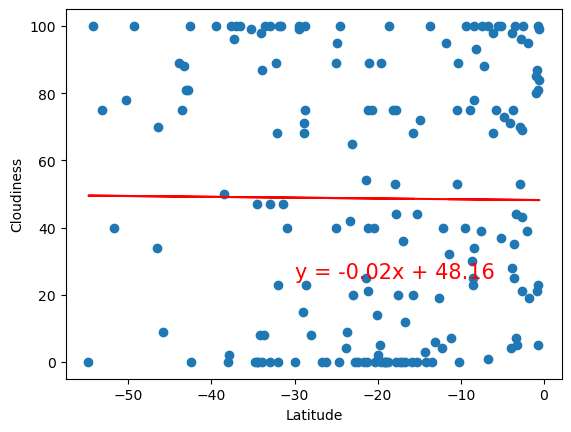

In [84]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness',(-30,25))
#plt.savefig("../output_data/Fig5.png")
#plt.savefig("output_data/Fig10.png")

The r-value is: 0.02056735429994368


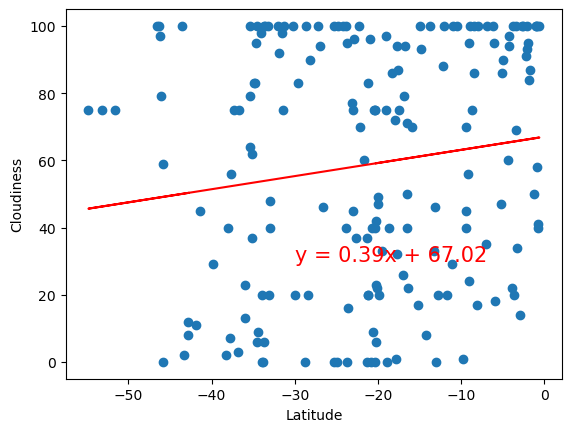

In [20]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE
The result from the data showed that there is a very week, almost none negative correlation between Cloudiness (%) and Latitude in the Southern Hemisphere cities.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0057312720791842155


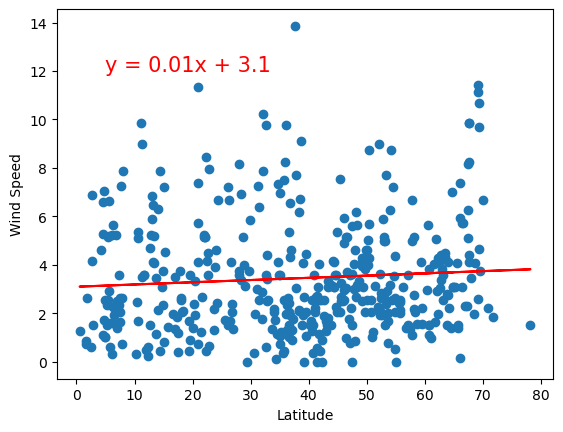

In [85]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed',(5,12))
#plt.savefig("../output_data/Fig5.png")
#plt.savefig("output_data/Fig11.png")

The r-value is: 0.04895804911934768


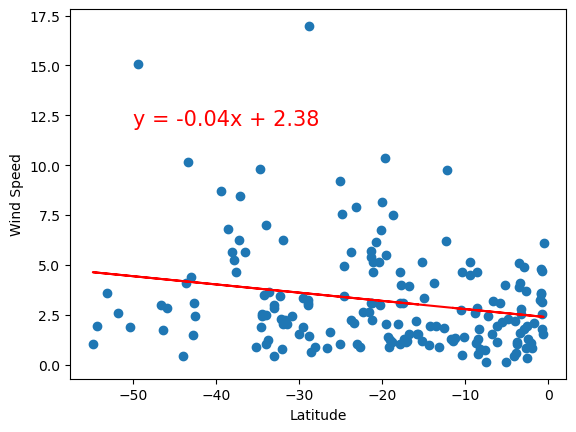

In [86]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed',(-50,12))
#plt.savefig("../output_data/Fig5.png")
#plt.savefig("output_data/Fig11.png")

**Discussion about the linear relationship:** YOUR RESPONSE HERE
The result from the data showed that there is a very week, positive correlation between Wind Speed (mph (%) and Latitude in the Northern Hemisphere cities. There is also a week negative correlation between Wind Speed (mph (%) and Latitude in the Southern Hemisphere cities.